In [ ]:
!pip install soundfile simpleaudio
!pip install librosa scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp311-cp311-linux_x86_64.whl size=2054421 sha256=4d3968516aa2b334dac9b334d8bfc2bc45466c5e27184a26793badfc2067be0d
  Stored in directory: /root/.cache/pip/wheels/44/74/11/9d2cf6ddf5d0dcc7750484a371b92fdb036f5496d1d4b42d08
Successfully built simpleaudio


Sample Rate: 22050 Hz
Number of Samples: 103837
Duration: 4.71 seconds


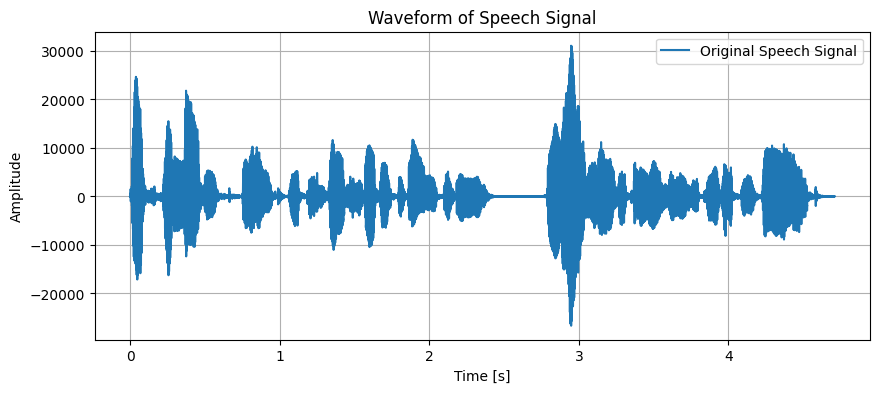

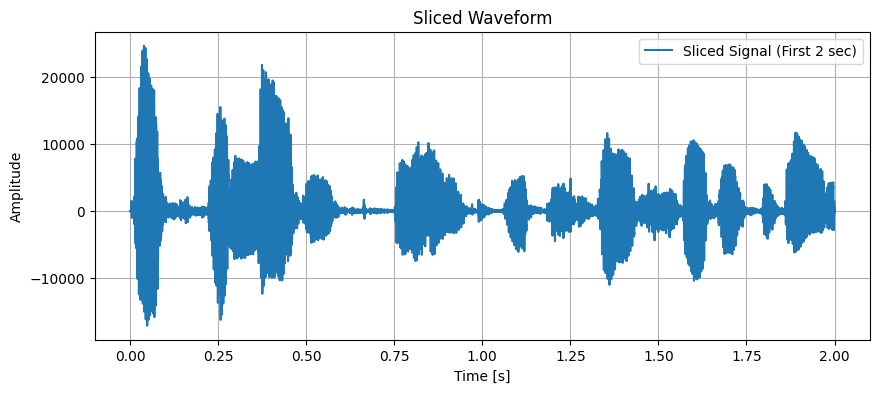

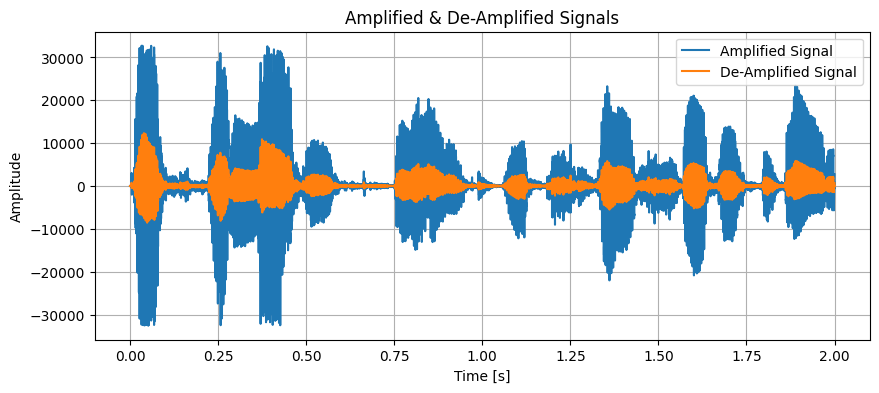

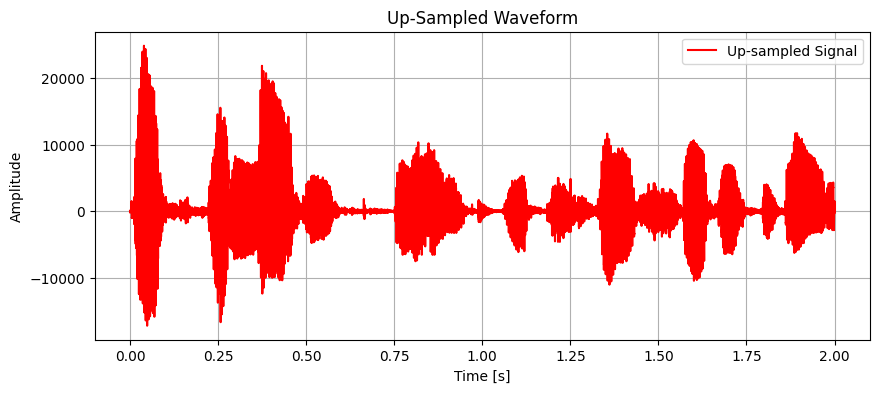

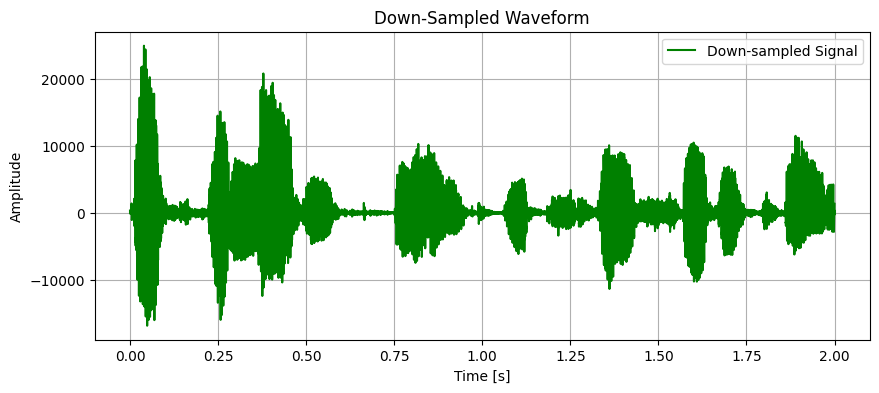

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample

# Function to read and plot a speech file
def plot_speech_waveform(file_path):
    # Open the wave file
    with wave.open(file_path, 'r') as wav_file:
        # Extract basic information
        sample_rate = wav_file.getframerate()
        num_samples = wav_file.getnframes()
        duration = num_samples / sample_rate

        print(f"Sample Rate: {sample_rate} Hz")
        print(f"Number of Samples: {num_samples}")
        print(f"Duration: {duration:.2f} seconds")

        # Read frames and convert to numpy array
        signal = wav_file.readframes(num_samples)
        signal = np.frombuffer(signal, dtype=np.int16)

        # Time axis
        time_axis = np.linspace(0, duration, num=num_samples)

        # Plot the waveform
        plt.figure(figsize=(10, 4))
        plt.plot(time_axis, signal, label='Original Speech Signal')
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')
        plt.title('Waveform of Speech Signal')
        plt.legend()
        plt.grid()
        plt.show()

        # Slicing (First 2 seconds)
        slice_samples = int(2 * sample_rate)
        sliced_signal = signal[:slice_samples]
        time_sliced = np.linspace(0, 2, num=slice_samples)

        plt.figure(figsize=(10, 4))
        plt.plot(time_sliced, sliced_signal, label='Sliced Signal (First 2 sec)')
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')
        plt.title('Sliced Waveform')
        plt.legend()
        plt.grid()
        plt.show()


        # Amplification and De-Amplification
        amplified_signal = sliced_signal * 2
        deamplified_signal = sliced_signal * 0.5

        plt.figure(figsize=(10, 4))
        plt.plot(time_sliced, amplified_signal, label='Amplified Signal')
        plt.plot(time_sliced, deamplified_signal, label='De-Amplified Signal')
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')
        plt.title('Amplified & De-Amplified Signals')
        plt.legend()
        plt.grid()
        plt.show()

        # Up-sampling (Doubling Sample Rate)
        upsampled_signal = resample(sliced_signal, len(sliced_signal) * 2)
        time_upsampled = np.linspace(0, 2, num=len(upsampled_signal))

        plt.figure(figsize=(10, 4))
        plt.plot(time_upsampled, upsampled_signal, label='Up-sampled Signal',color='red')
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')
        plt.title('Up-Sampled Waveform')
        plt.legend()
        plt.grid()
        plt.show()

        # Down-sampling (Halving Sample Rate)
        downsampled_signal = resample(sliced_signal, len(sliced_signal) // 2)
        time_downsampled = np.linspace(0, 2, num=len(downsampled_signal))

        plt.figure(figsize=(10, 4))
        plt.plot(time_downsampled, downsampled_signal, label='Down-sampled Signal' ,color='green')
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')
        plt.title('Down-Sampled Waveform')
        plt.legend()
        plt.grid()
        plt.show()

# Example usage (provide path to a .wav file)
plot_speech_waveform("/content/LJ001-0137.wav")
